In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


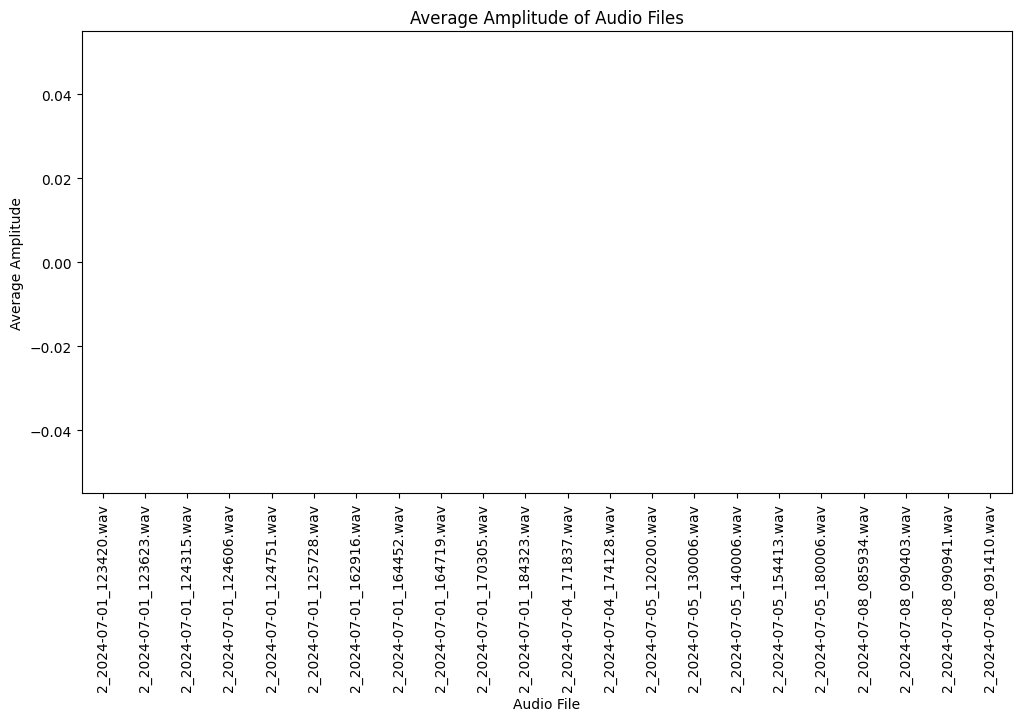

In [5]:
import os
import pandas as pd
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_average_amplitude(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    if len(y) > 0:
        return np.mean(np.abs(y))
    else:
        return 0

def process_audios_in_folder(folder_path):
    amplitude_data = []
    for audio_file in os.listdir(folder_path):
        if audio_file.endswith(('.wav', '.mp3')):
            audio_path = os.path.join(folder_path, audio_file)
            average_amplitude = calculate_average_amplitude(audio_path)
            amplitude_data.append((audio_file, average_amplitude))
    return pd.DataFrame(amplitude_data, columns=['audio_file', 'average_amplitude'])

# Folder containing audio files in Google Drive
audio_folder = '/content/drive/My Drive/audio'

# Process all audio files in the folder
df = process_audios_in_folder(audio_folder)

# Visualize average amplitude of audio files
plt.figure(figsize=(12, 6))
sns.barplot(x='audio_file', y='average_amplitude', data=df)
plt.xlabel('Audio File')
plt.ylabel('Average Amplitude')
plt.title('Average Amplitude of Audio Files')
plt.xticks(rotation=90)
plt.show()